Import the data

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()

In [3]:
fetch_housing_data()

Pandas reading your csv file

In [4]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts() # valuable with analyzing text fields

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe() # analyses numerical only

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


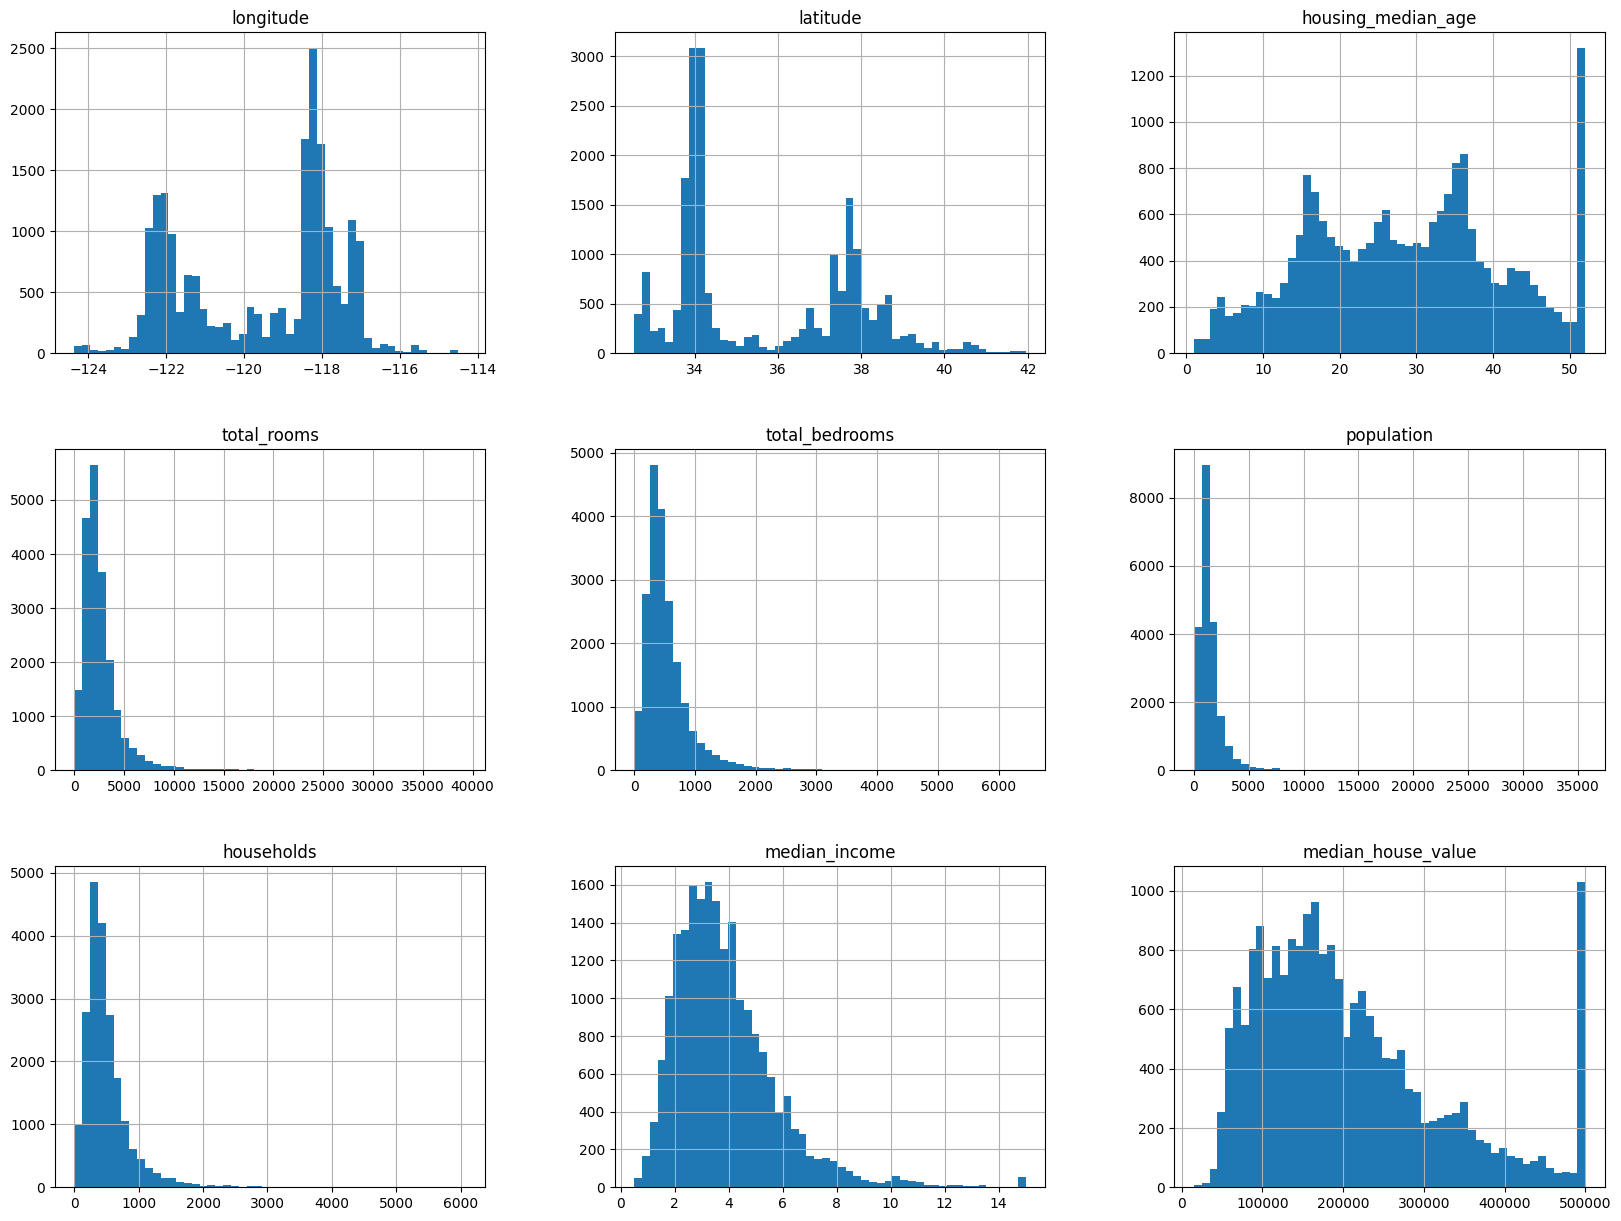

In [9]:
#%matplotlib inline # only in a Jupyter notebook
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()


In [10]:
import numpy as np

def splitTestData(data, test_size):
    shuffledIndices = np.random.permutation(len(data))
    testSize = int( len(data) * test_size )
    trainIndices = shuffledIndices[testSize:]
    testIndices = shuffledIndices[:testSize]
    return data.iloc[trainIndices],data.iloc[testIndices]

In [11]:
trainSet,testSet = splitTestData(housing,0.2)

print(len(housing),len(trainSet),len(testSet))

20640 16512 4128


In [12]:
from zlib import crc32

def testSetCheck(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32 # checks if the hash of the identifier is less than 20% of maximum POSSIBLE i.e. 2**32

In [13]:
def split_train_test_by_id(data, test_ratio, id_column):
 ids = data[id_column]
 in_test_set = ids.apply(lambda id_: testSetCheck(id_, test_ratio))  
 return data.loc[~in_test_set], data.loc[in_test_set]


In [14]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [16]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,3
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,3
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,3
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,2
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,3
...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN,5
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND,3
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN,2
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,4


<AxesSubplot:>

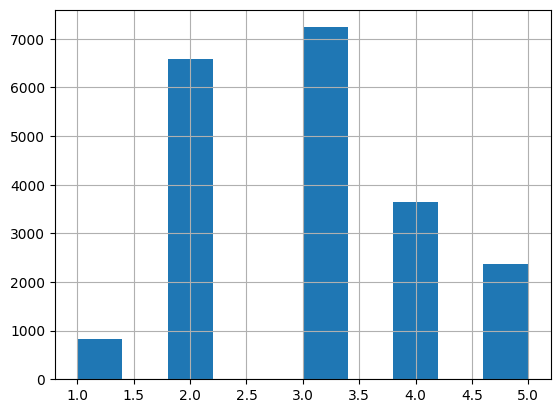

In [18]:
housing["income_cat"].hist()

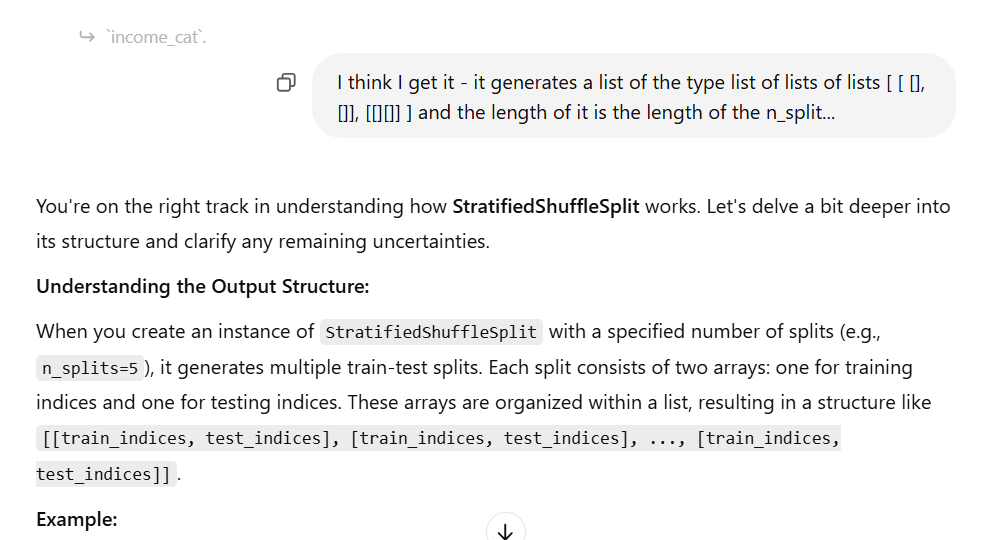

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=12, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]
 
split.split(housing, housing["income_cat"])


<generator object BaseShuffleSplit.split at 0x000001FC35A778B0>

In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [21]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set) # this cross validatoin approach matches probabilities

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [22]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)
 
strat_test_set.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4975,-118.28,34.00,44.0,2636.0,725.0,2182.0,651.0,1.4320,124000.0,<1H OCEAN
8954,-118.39,34.02,38.0,2447.0,636.0,1312.0,574.0,3.5909,279400.0,<1H OCEAN
882,-121.96,37.55,4.0,3746.0,993.0,1606.0,838.0,4.1387,162500.0,<1H OCEAN
12480,-121.49,38.58,52.0,1000.0,324.0,456.0,250.0,1.4375,168800.0,INLAND
7048,-118.05,33.94,34.0,495.0,120.0,527.0,130.0,1.9453,149000.0,<1H OCEAN
9704,-121.64,36.66,24.0,3174.0,506.0,1466.0,535.0,5.2285,248100.0,<1H OCEAN
8770,-118.34,33.79,36.0,716.0,123.0,388.0,124.0,5.0254,350000.0,<1H OCEAN
5436,-118.43,34.01,27.0,3133.0,1021.0,2242.0,1002.0,2.6970,412500.0,<1H OCEAN
10515,-117.70,33.53,5.0,6698.0,1254.0,2834.0,1139.0,5.9088,288500.0,<1H OCEAN
11271,-117.99,33.79,21.0,2695.0,707.0,1888.0,683.0,3.2857,213300.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

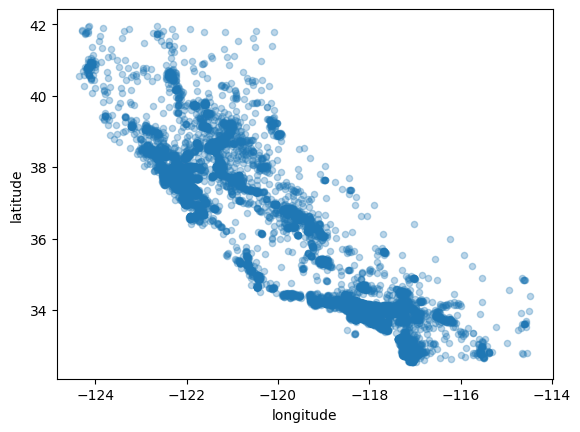

In [23]:
housing = strat_train_set.copy()

housing.plot(kind = "scatter", x="longitude",y="latitude",alpha=0.3)

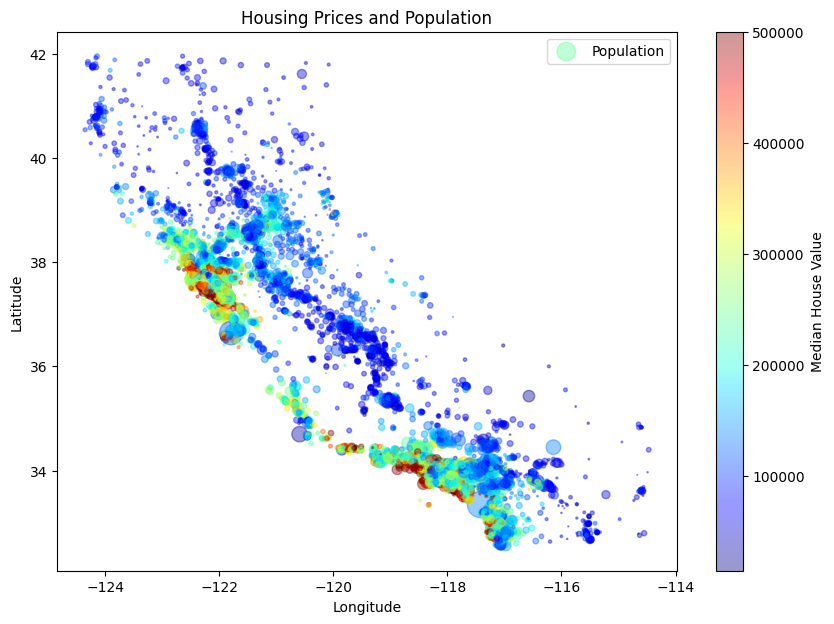

In [24]:
import matplotlib.pyplot as plt
import numpy as np

x = housing["longitude"]
y = housing["latitude"]

color = housing["median_house_value"]
radius = housing["population"]/100

plt.figure(figsize=(10,7))
scatter = plt.scatter(x,y,alpha=0.4,s=radius, c = color, cmap=plt.get_cmap("jet"))

plt.colorbar(scatter, label='Median House Value')

# Adding labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Prices and Population')
plt.legend(['Population'])

plt.show()


In [25]:
corr_matrix = corr_matrix = housing.select_dtypes(include=[np.number]).corr() # only works with numerial vlues
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925151,-0.103713,0.045519,0.071601,0.099953,0.057065,-0.014407,-0.044109
latitude,-0.925151,1.000000,0.005205,-0.036459,-0.069045,-0.108672,-0.072178,-0.079089,-0.144797
housing_median_age,-0.103713,0.005205,1.000000,-0.363053,-0.322245,-0.293285,-0.303519,-0.113708,0.109710
total_rooms,0.045519,-0.036459,-0.363053,1.000000,0.930139,0.849576,0.917422,0.199090,0.137260
total_bedrooms,0.071601,-0.069045,-0.322245,0.930139,1.000000,0.870740,0.979463,-0.006684,0.053210
population,0.099953,-0.108672,-0.293285,0.849576,0.870740,1.000000,0.901034,0.003095,-0.024285
households,0.057065,-0.072178,-0.303519,0.917422,0.979463,0.901034,1.000000,0.012525,0.068157
median_income,-0.014407,-0.079089,-0.113708,0.199090,-0.006684,0.003095,0.012525,1.000000,0.687045
median_house_value,-0.044109,-0.144797,0.109710,0.137260,0.053210,-0.024285,0.068157,0.687045,1.000000


In [26]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687045
total_rooms           0.137260
housing_median_age    0.109710
households            0.068157
total_bedrooms        0.053210
population           -0.024285
longitude            -0.044109
latitude             -0.144797
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

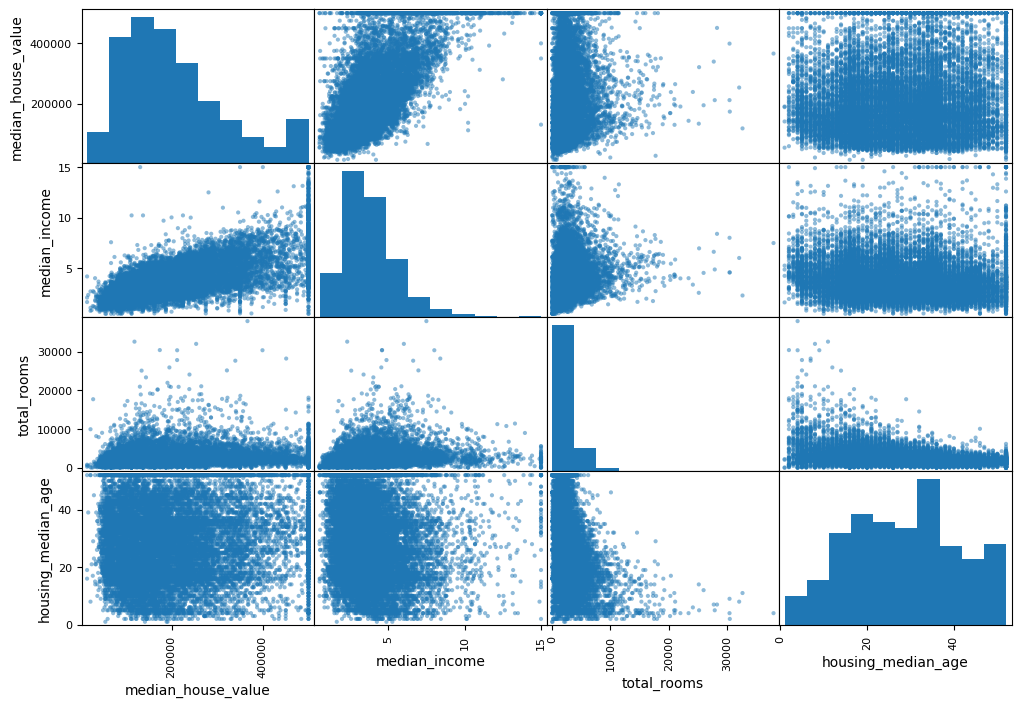

In [27]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

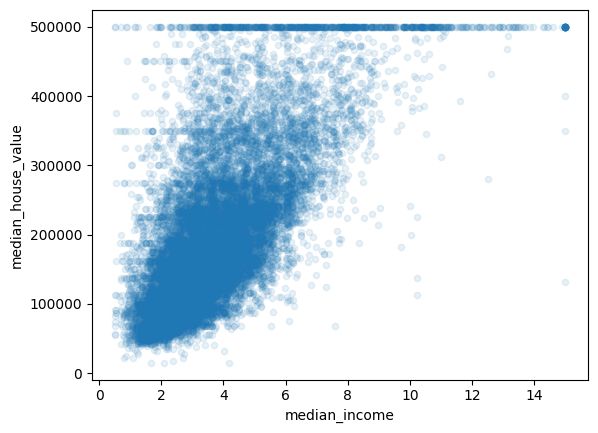

In [28]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

In [29]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [30]:
print(housing.select_dtypes(include=[np.number]).corr()['median_house_value'].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.687045
rooms_per_household         0.160747
total_rooms                 0.137260
housing_median_age          0.109710
households                  0.068157
total_bedrooms              0.053210
population_per_household   -0.022081
population                 -0.024285
longitude                  -0.044109
latitude                   -0.144797
bedrooms_per_room          -0.256402
Name: median_house_value, dtype: float64


In [31]:
housing = strat_train_set.drop("median_house_value", axis=1) # Doesnt affect the strat_train_set
housing_labels = strat_train_set["median_house_value"].copy() # creates a copy of the labels

In [32]:
housing.dropna(subset=["total_bedrooms"]) # removes rows with missing values in the total_bedrooms column
housing.drop("total_bedrooms",axis=1)#removes the item

median = housing["total_bedrooms"].median() # calculates the median of the total_bedrooms column
housing["total_bedrooms"].fillna(median) # fills the missing values with the median value

15974     250.0
14929    1368.0
14400     313.0
13239     405.0
4979      295.0
          ...  
9251      511.0
15280     511.0
16902     458.0
15984     670.0
10649    1292.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # creates an imputer object with a median strategy

housing_num = housing.drop("ocean_proximity", axis=1) # drops the ocean_proximity column
imputer.fit(housing_num) # fits the imputer to the numerical data

imputer.statistics_ # returns the median values for each column - and stores them))) we are going to need it

array([-118.49  ,   34.26  ,   29.    , 2128.    ,  436.    , 1170.    ,
        410.    ,    3.5313])

In [34]:
housing_num.median()

longitude             -118.4900
latitude                34.2600
housing_median_age      29.0000
total_rooms           2128.0000
total_bedrooms         436.0000
population            1170.0000
households             410.0000
median_income            3.5313
dtype: float64

In [35]:
X = imputer.transform(housing_num) # transforms the data using the imputer, replaces the NA values - it s numpy array though

housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing.index)   # creates a new DataFrame with the transformed data, using the original column names and index


housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
15974,-122.40,37.72,47.0,1167.0,250.0,953.0,253.0,4.2727
14929,-117.01,32.66,11.0,9992.0,1368.0,4495.0,1316.0,6.9664
14400,-117.28,32.75,34.0,981.0,313.0,508.0,304.0,2.2328
13239,-117.66,34.13,17.0,3229.0,405.0,1289.0,407.0,6.3842
4979,-118.29,34.00,52.0,1319.0,295.0,898.0,271.0,2.7727


## HANDLING TEXT AND CATEGORICAL DATA

In [36]:
housing_cat = housing[["ocean_proximity"]].copy() # creates a copy of the ocean_proximity column
housing_cat.head()

,ocean_proximity
15974,NEAR BAY
14929,NEAR OCEAN
14400,NEAR OCEAN
13239,INLAND
4979,<1H OCEAN


In [37]:
from sklearn.preprocessing import OrdinalEncoder

ordinalEncoder = OrdinalEncoder() # creates an OrdinalEncoder object

housing_cat_encoded = ordinalEncoder.fit_transform(housing_cat) # fits the encoder to the data and transforms it
housing_cat_encoded[:10] # returns the first 10 rows of the encoded data

array([[3.],
       [4.],
       [4.],
       [1.],
       [0.],
       [1.],
       [4.],
       [4.],
       [1.],
       [0.]])

In [38]:
ordinalEncoder.categories_ # returns the categories for each column

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
from sklearn.preprocessing import OneHotEncoder
oneHotEncoder = OneHotEncoder()

housing_cat_1hot = oneHotEncoder.fit_transform(housing_cat) # fits the encoder to the data and transforms it  
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [40]:
housing_cat_1hot.toarray() # returns the encoded data as a numpy array

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [41]:
oneHotEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 # indexes of the columns
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

normaliser = MinMaxScaler() # creates a normaliser object
standardiser = StandardScaler() # creates a standardiser object

housing_num_tr = normaliser.fit_transform(housing_num) # fits the normaliser to the data and transforms it
pd.DataFrame(housing_num_tr).head()


,0,1,2,3,4,5,6,7
0,0.197368,0.550000,0.901961,0.030710,0.038641,0.026626,0.041441,0.260190
1,0.742915,0.011702,0.196078,0.263345,0.212135,0.125900,0.216247,0.445959
2,0.715587,0.021277,0.647059,0.025807,0.048417,0.014154,0.049827,0.119509
3,0.677126,0.168085,0.313725,0.085067,0.062694,0.036044,0.066765,0.405808
4,0.613360,0.154255,1.000000,0.034717,0.045624,0.025085,0.044401,0.156743


In [44]:

housing_num_tr = standardiser.fit_transform(housing_num) # fits the standardiser to the data and transforms it
pd.DataFrame(housing_num_tr).head()

,0,1,2,3,4,5,6,7
0,-1.414703,0.981983,1.458224,-0.677250,-0.685810,-0.416416,-0.646234,0.210678
1,1.276821,-1.390554,-1.400062,3.407059,1.979823,2.710641,2.146431,1.622833
2,1.141996,-1.348355,0.426066,-0.763333,-0.535600,-0.809285,-0.512250,-0.858726
3,0.952241,-0.701299,-0.923681,0.277067,-0.316245,-0.119778,-0.241653,1.317619
4,0.637647,-0.762254,1.855209,-0.606903,-0.578517,-0.464973,-0.598946,-0.575687


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

nums_pipeline = Pipeline([
    ('median',SimpleImputer(strategy="median")),
    ('attr_adder',CombinedAttributesAdder()),
    ('StandardScaler',StandardScaler())
])

housing_num_tr = nums_pipeline.fit_transform(housing_num) # fits the pipeline to the data and transforms it
pd.DataFrame(housing_num_tr).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.414703,0.981983,1.458224,-0.677250,-0.686627,-0.416416,-0.646234,0.210678,-0.338469,0.057301,0.000710
1,1.276821,-1.390554,-1.400062,3.407059,1.991640,2.710641,2.146431,1.622833,0.909685,0.027032,-1.164981
2,1.141996,-1.348355,0.426066,-0.763333,-0.535705,-0.809285,-0.512250,-0.858726,-0.918839,-0.123356,1.581365
3,0.952241,-0.701299,-0.923681,0.277067,-0.315311,-0.119778,-0.241653,1.317619,1.052490,0.005604,-1.338122
4,0.637647,-0.762254,1.855209,-0.606903,-0.578826,-0.464973,-0.598946,-0.575687,-0.231871,0.018239,0.142884


Lets try to recreate the example

In [46]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", nums_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

# Get the correct column names
num_columns = num_attribs + ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_columns = [f"ocean_proximity_{val}" for val in housing["ocean_proximity"].unique()]
all_columns = num_columns + cat_columns

# Create DataFrame with correct columns
pd.DataFrame(housing_prepared, columns=all_columns).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_INLAND,ocean_proximity_<1H OCEAN,ocean_proximity_ISLAND
0,-1.414703,0.981983,1.458224,-0.677250,-0.686627,-0.416416,-0.646234,0.210678,-0.338469,0.057301,0.000710,0.0,0.0,0.0,1.0,0.0
1,1.276821,-1.390554,-1.400062,3.407059,1.991640,2.710641,2.146431,1.622833,0.909685,0.027032,-1.164981,0.0,0.0,0.0,0.0,1.0
2,1.141996,-1.348355,0.426066,-0.763333,-0.535705,-0.809285,-0.512250,-0.858726,-0.918839,-0.123356,1.581365,0.0,0.0,0.0,0.0,1.0
3,0.952241,-0.701299,-0.923681,0.277067,-0.315311,-0.119778,-0.241653,1.317619,1.052490,0.005604,-1.338122,0.0,1.0,0.0,0.0,0.0
4,0.637647,-0.762254,1.855209,-0.606903,-0.578826,-0.464973,-0.598946,-0.575687,-0.231871,0.018239,0.142884,1.0,0.0,0.0,0.0,0.0


# Select and Train Model


In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)  # fits the model to the prepared data

LinearRegression()

In [48]:
some_data = housing_prepared[:5]  # takes the first 5 rows of the prepared data
some_labels = housing_labels[:5]  # takes the first 5 labels
print("Predictions:", lin_reg.predict(some_data))  # predicts the values for the first 5 rows
print("Labels:", list(some_labels))  # prints the first 5 labels

Predictions: [257404.26724914 309551.37492863 197277.33664496 239060.3129104
 198678.60040974]
Labels: [241900.0, 293900.0, 266700.0, 307100.0, 128600.0]


In [49]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)  # predicts the values for the whole dataset
lin_mse = mean_squared_error(housing_labels, housing_predictions)  # calculates the mean squared error
lin_rmse = np.sqrt(lin_mse)  # calculates the root mean squared error

print("MSE:", lin_mse)  # prints the mean squared error
print("RMSE:", lin_rmse)  # prints the root mean squared error

MSE: 4673511239.61286
RMSE: 68363.08389483947


In [50]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)  # creates a DecisionTreeRegressor object
tree_reg.fit(housing_prepared, housing_labels)  # fits the model to the prepared data


DecisionTreeRegressor(random_state=42)

In [51]:
housing_predictions = tree_reg.predict(housing_prepared)
lim_mse = mean_squared_error(housing_labels, housing_predictions)  # calculates the mean squared error
lin_rmse = np.sqrt(lim_mse)  # calculates the root mean squared error

print("MSE:", lim_mse)  # prints the mean squared error
print("RMSE:", lin_rmse)  # prints the root mean squared error

MSE: 0.0
RMSE: 0.0


# Cross Validation! How to use it and how to compare

In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring = "neg_mean_squared_error")  # performs cross-validation
tree_rms_scores = np.sqrt(-scores)
print("Scores:", tree_rms_scores)  # prints the scores
print("Mean:", tree_rms_scores.mean())  # prints the mean of the scores
print("Standard Deviation:", tree_rms_scores.std())  # prints the standard deviation of the scores

Scores: [73677.79469283 70053.08277281 69575.76330725 68198.08310614
 71699.69077488 75240.69289553 69850.29557856 70299.15447891
 69550.85515718 71866.68570456]
Mean: 71001.20984686496
Standard Deviation: 2026.909555298543


In [53]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring = "neg_mean_squared_error")  # performs cross-validation
lin_rms_scores = np.sqrt(-scores)
print("Scores:", lin_rms_scores)  # prints the scores
print("Mean:", lin_rms_scores.mean())  # prints the mean of the scores
print("Standard Deviation:", lin_rms_scores.std())  # prints the standard deviation of the scores

Scores: [72073.90669057 68272.7004699  66466.54205605 66948.36952647
 68014.19730583 68965.49026493 70626.83967943 65758.29843909
 69354.83683477 70167.82281887]
Mean: 68664.90040859152
Standard Deviation: 1873.5127403521385


In [54]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [55]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)  # creates a RandomForestRegressor object
forest_reg.fit(housing_prepared, housing_labels)  # fits the model to the prepared data
housing_predictions = forest_reg.predict(housing_prepared)  # predicts the values for the whole dataset

forest_mse = mean_squared_error(housing_labels, housing_predictions)  # calculates the mean squared error
forest_rmse = np.sqrt(forest_mse)  # calculates the root mean squared error
print("MSE:", forest_mse)  # prints the mean squared error
print("RMSE:", forest_rmse)  # prints the root mean squared error

scores = cross_val_score(forest_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")  # performs cross-validation
forest_reg_scores = np.sqrt(-scores)  # calculates the root mean squared error

display_scores(forest_reg_scores)  # displays the scores

MSE: 350291064.6349478
RMSE: 18716.064346837124
Scores: [50810.88979716 51330.84402833 49261.37400705 47486.8355654
 49955.02191085 52681.77289631 48686.63616976 49977.70539553
 48614.53280084 52661.44985304]
Mean: 50146.706242426626
Standard Deviation: 1643.0827697964592


# Fine Tuning

## GridSearch

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {"bootstrap": [False], "max_features": [2, 3, 4], "n_estimators": [3,10] }
]

forest_reg = RandomForestRegressor()  # creates a RandomForestRegressor object

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)  # creates a GridSearchCV object

grid_search.fit(housing_prepared, housing_labels)  # fits the model to the prepared data


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
grid_search.best_params_  # returns the best parameters

{'max_features': 6, 'n_estimators': 30}

In [58]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [59]:
cv_res = grid_search.cv_results_  # returns the cross-validation results
print(cv_res)

{'mean_fit_time': array([0.09036427, 0.31497293, 0.76452913, 0.14141808, 0.43720183,
       1.14915037, 0.13768821, 0.58477254, 1.5060308 , 0.20704432,
       0.61218371, 2.30706363, 0.14068222, 0.48932366, 0.13225937,
       0.6262404 , 0.1999999 , 0.68195391]), 'std_fit_time': array([0.01456811, 0.04624657, 0.05544943, 0.01465966, 0.08214047,
       0.09850678, 0.00523534, 0.08496659, 0.07772987, 0.04254607,
       0.04025903, 0.27024855, 0.02999857, 0.11093536, 0.00959213,
       0.09281707, 0.07607175, 0.07938411]), 'mean_score_time': array([0.00575938, 0.01783938, 0.03392897, 0.00668802, 0.01340179,
       0.02984834, 0.00362859, 0.01109762, 0.03667994, 0.00448484,
       0.01207294, 0.03879647, 0.00725617, 0.01461439, 0.00419011,
       0.01792765, 0.00526652, 0.01409607]), 'std_score_time': array([0.00140216, 0.00559768, 0.00665802, 0.00098425, 0.00374026,
       0.0072865 , 0.00051717, 0.00247456, 0.00768234, 0.00035304,
       0.00332194, 0.00510209, 0.00157154, 0.0026526 , 0.

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the parameter distribution (use distributions instead of explicit lists)
param_distribs = {
    'n_estimators': randint(low=1, high=50),
    'max_features': randint(low=1, high=9),
    'bootstrap': [True, False]
}

# Create the RandomForestRegressor
forest_reg = RandomForestRegressor()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    forest_reg,
    param_distributions=param_distribs,
    n_iter=10,  # Number of random combinations to try
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    random_state=42
)

# Fit the search to the data
random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC38199840>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC3819AEF0>},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [61]:
random_search.best_params_  # returns the best parameters

{'bootstrap': False, 'max_features': 6, 'n_estimators': 38}

In [62]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=6, n_estimators=38)

In [63]:
cv_results = random_search.cv_results_  # returns the cross-validation results

for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(np.sqrt(-mean_score), params)  # prints the root mean squared error and the parameters

50174.15018711185 {'bootstrap': True, 'max_features': 4, 'n_estimators': 29}
54534.86429581311 {'bootstrap': True, 'max_features': 3, 'n_estimators': 8}
49760.47661445724 {'bootstrap': True, 'max_features': 5, 'n_estimators': 39}
50228.64249308561 {'bootstrap': False, 'max_features': 3, 'n_estimators': 23}
51407.2351921249 {'bootstrap': True, 'max_features': 3, 'n_estimators': 24}
49856.74741949109 {'bootstrap': True, 'max_features': 4, 'n_estimators': 40}
50347.560445180956 {'bootstrap': False, 'max_features': 3, 'n_estimators': 22}
53032.054359710295 {'bootstrap': True, 'max_features': 2, 'n_estimators': 24}
48980.21812667287 {'bootstrap': False, 'max_features': 6, 'n_estimators': 38}
49854.16519794988 {'bootstrap': False, 'max_features': 8, 'n_estimators': 21}


In [64]:
feature_importances = random_search.best_estimator_.feature_importances_  # gets the feature importances
feature_importances

array([7.87112100e-02, 7.01246854e-02, 3.94094660e-02, 1.68839475e-02,
       1.59433553e-02, 1.62262225e-02, 1.50938824e-02, 3.49901921e-01,
       5.45504241e-02, 1.06610353e-01, 6.11398971e-02, 7.23735386e-03,
       1.60297708e-01, 1.19243000e-04, 2.85998481e-03, 4.89034645e-03])

In [65]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3499019208456265, 'median_income'),
 (0.16029770779437702, 'INLAND'),
 (0.10661035291729493, 'pop_per_hhold'),
 (0.07871121001435905, 'longitude'),
 (0.07012468542211239, 'latitude'),
 (0.0611398970563808, 'bedrooms_per_room'),
 (0.05455042413460832, 'rooms_per_hhold'),
 (0.03940946598868958, 'housing_median_age'),
 (0.016883947502983672, 'total_rooms'),
 (0.016226222541275363, 'population'),
 (0.015943355300054873, 'total_bedrooms'),
 (0.01509388236174365, 'households'),
 (0.007237353864698571, '<1H OCEAN'),
 (0.004890346449113649, 'NEAR OCEAN'),
 (0.0028599848067813057, 'NEAR BAY'),
 (0.0001192429999003633, 'ISLAND')]

In [66]:
final_model = random_search.best_estimator_  # gets the best estimator
X_test = strat_test_set.drop("median_house_value", axis=1)  # prepares the test data
X_test_prepared = full_pipeline.transform(X_test)  # transforms the test data

y_test = strat_test_set["median_house_value"].copy()  # gets the test labels
final_predictions = final_model.predict(X_test_prepared)  # predicts the values for the test data

final_mse = mean_squared_error(y_test, final_predictions)  # calculates the mean squared error
final_rmse = np.sqrt(final_mse)  # calculates the root mean squared error

print("Final RMSE:", final_rmse)  # prints the final root mean squared error

Final RMSE: 48102.30428830274


In [68]:
from scipy import stats
confidence = 0.95  # confidence level
squared_errors = (final_predictions - y_test) ** 2  # calculates the squared errors
np.sqrt( stats.t.interval(confidence, len(squared_errors) - 1, loc = squared_errors.mean(), scale = stats.sem(squared_errors)) )  # calculates the confidence interval for the root mean squared error)

array([45821.04717924, 50280.16498667])

# Exercise


In [70]:
from sklearn.svm import SVR

svm_reg_linear = SVR(kernel="linear")
svm_reg_rdf = SVR(kernel="rbf")
svm_reg_quadratic = SVR(kernel="poly", degree=2)

svm_reg_linear.fit(housing_prepared, housing_labels)  # fits the model to the prepared data
svm_reg_rdf.fit(housing_prepared, housing_labels)  # fits the model to the prepared data
svm_reg_quadratic.fit(housing_prepared, housing_labels)  # fits the model to the prepared data

linearMSE = mean_squared_error(housing_labels, svm_reg_linear.predict(housing_prepared))  # calculates the mean squared error
linearRMSE = np.sqrt(linearMSE)  # calculates the root mean squared error
rdfMSE = mean_squared_error(housing_labels, svm_reg_rdf.predict(housing_prepared))  # calculates the mean squared error
rdfRMSE = np.sqrt(rdfMSE)  # calculates the root mean squared error
quadraticMSE = mean_squared_error(housing_labels, svm_reg_quadratic.predict(housing_prepared))  # calculates the mean squared error
quadraticRMSE = np.sqrt(quadraticMSE)  # calculates the root mean squared error

linear_cross_val_scores = cross_val_score(svm_reg_linear, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")  # performs cross-validation
linear_rms_scores = np.sqrt(-linear_cross_val_scores)  # calculates the root mean squared error

rdf_cross_val_scores = cross_val_score(svm_reg_rdf, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")  # performs cross-validation
rdf_rms_scores = np.sqrt(-rdf_cross_val_scores)  # calculates the root mean squared error

quadratic_cross_val_scores = cross_val_score(svm_reg_quadratic, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")  # performs cross-validation
quadratic_rms_scores = np.sqrt(-quadratic_cross_val_scores)  # calculates the root mean squared error

print("Linear SVM RMSE:", linearRMSE)  # prints the root mean squared error
print("RBF SVM RMSE:", rdfRMSE)  # prints the root mean squared error
print("Quadratic SVM RMSE:", quadraticRMSE)  # prints the root mean squared error

display_scores(linear_rms_scores)  # displays the scores for the linear SVM
display_scores(rdf_rms_scores)  # displays the scores for the RBF SVM  
display_scores(quadratic_rms_scores)  # displays the scores for the quadratic SVM

Linear SVM RMSE: 110506.54058141816
RBF SVM RMSE: 118015.00985202225
Quadratic SVM RMSE: 118185.90576465838
Scores: [115247.63841337 110381.84427603 113930.14546596 110049.42304524
 107188.05215701 112257.06821455 112294.72200191 104521.92086049
 111428.64521593 114506.77844419]
Mean: 111180.62380946879
Standard Deviation: 3159.459780002116
Scores: [122204.42128735 116999.81867661 121206.4667117  116778.4459401
 113612.39958783 119096.59742975 118824.01143828 111387.58033
 118321.52452968 121601.82349389]
Mean: 118003.30894251812
Standard Deviation: 3292.175529819074
Scores: [122427.62211981 117143.67029466 121364.01537778 116973.2814881
 113781.4811338  119205.795972   119031.9035895  111628.07690168
 118467.77852581 121794.62618996]
Mean: 118181.82515931039
Standard Deviation: 3284.986509702156
